# Logistic regression

In [1]:
import numpy as np

from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Logistic regression

## 1.1 Data wrangling

In [2]:
data = np.loadtxt("datasets/ex2data1.txt", delimiter=",")

In [3]:
data

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ],
       [ 61.10666454,  96.51142588,   1.        ],
       [ 75.02474557,  46.55401354,   1.        ],
       [ 76.0987867 ,  87.42056972,   1.        ],
       [ 84.43281996,  43.53339331,   1.        ],
       [ 95.86155507,  38.22527806,   0.        ],
       [ 75.01365839,  30.60326323,   0.        ],
       [ 82.30705337,  76.4819633 ,   1.        ],
       [ 69.36458876,  97.71869196,   1.        ],
       [ 39.53833914,  76.03681085,   0.        ],
       [ 53.97105215,  89.20735014,   1.        ],
       [ 69.07014406,  52.74046973,   1.        ],
       [ 67.94685548,  46.67857411,   0.        ],
       [ 70.66150955,  92.92713789,   1.        ],
       [ 76.97878373,  47.57596

In [4]:
X = data[:, [0, 1]]
y = data[:, [2]]

## 1.2 Data exploration

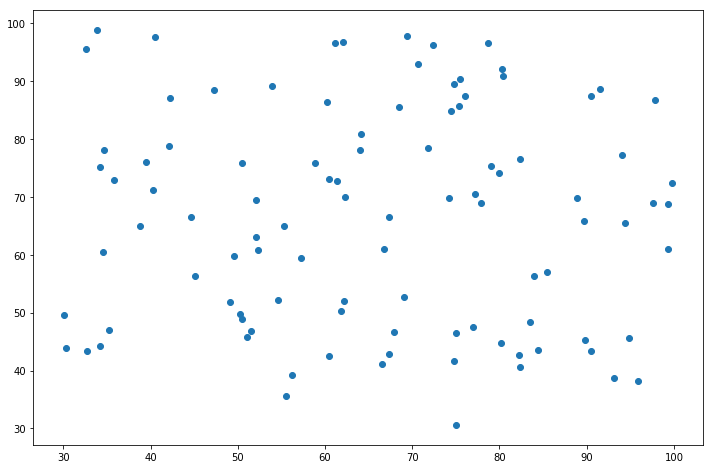

In [5]:
fig, axes = plt.subplots(figsize=(12, 8))
axes = plt.scatter(X[:, 0], X[:, 1])

In [6]:
## TODO: Add plot with marked class.

## 1.3 Sigmoid function

In [7]:
def sigmoid(z):
    return 1 / (1 + np.e ** -z)

In [8]:
sigmoid(np.array([0, 1, 2, -10, -100]))

array([  5.00000000e-01,   7.31058579e-01,   8.80797078e-01,
         4.53978687e-05,   3.72007598e-44])

In [9]:
assert sigmoid(0) == 0.5, "Incorrect value."

In [10]:
assert(round(sigmoid(10), 4) == 1), "Incorrect value."

In [11]:
assert(round(sigmoid(-10), 4) == 0), "Incorrect value."

## 1.4 Cost function

In [12]:
# TODO: Add equations and descriptions here from writeup pdf - in tex.

In [13]:
X = np.array([np.ones(X.shape[0]), X[:, 0], X[:, 1]]).T

In [14]:
m, n = X.shape

In [15]:
initial_theta = np.zeros((n, 1))

In [16]:
def cost_function(theta, X, y):
    prediction = sigmoid(np.dot(X, theta))
    sum_exp = np.sum(-np.dot(y.T, np.log(prediction)) - np.dot((1 - y).T, np.log(1 - prediction)))
    J_theta = 1 / m * sum_exp
    return J_theta

In [17]:
J_theta = cost_function(initial_theta, X, y)

In [18]:
assert round(J_theta, 3) == 0.693, "Incorrect value."

In [19]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(3, 1)
test_theta

array([[-24. ],
       [  0.2],
       [  0.2]])

In [20]:
J_theta = cost_function(test_theta, X, y)
J_theta

0.21833019382659785

In [21]:
assert round(J_theta, 3) == 0.218, "Incorrect value."

## 1.5 Gradient descent

In [22]:
iters = 1500000
alpha = 0.0034
initial_theta = np.zeros((n, 1))

In [ ]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    theta_res = theta.copy()
    for _ in range(iters):
        prediction = sigmoid(np.dot(X, theta_res))
        diff = prediction - y.reshape(m, 1)
        J_exp = (1 / m) * np.dot(X.T, diff)
        theta_res = theta_res - alpha * J_exp
    return theta_res

In [ ]:
theta_res = gradient_descent(X, y, initial_theta, alpha, iters)
theta_res

In [ ]:
J_theta = cost_function(theta_res, X, y)
J_theta

In [ ]:
# TODO: Visualize the boundary

## 1.6 Evaluating logistic regression

In [ ]:
# TODO: Predict

In [ ]:
def predict_proba(theta, X):
    return sigmoid(np.dot(X, theta))

In [ ]:
prob = predict_proba(theta_res, np.array([1, 45, 85]))
prob

In [ ]:
# TODO: Compute accuracy on our training set

In [ ]:
def predict(theta, X):
    proba = predict_proba(theta, X)
    return (proba >= 0.5).astype(int) 

In [ ]:
prediction = predict(theta_res, X)

In [ ]:
(prediction == y).astype(int).mean() # accuracy score

## 1.7 Advanced optimization

In [ ]:
# TODO: Implement this using optimizers like here:
# https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy

# Add grad and cost functions. 

In [ ]:
# TODO: Visualize the boundary

In [ ]:
# TODO: Predict

## 2. Regularized logistic regression

## 2.1 Data wrangling

In [63]:
data = np.loadtxt("datasets/ex2data2.txt", delimiter=",")

In [64]:
data

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [65]:
X = data[:, [0, 1]]
y = data[:, [2]]

## 2.2 Data exploration

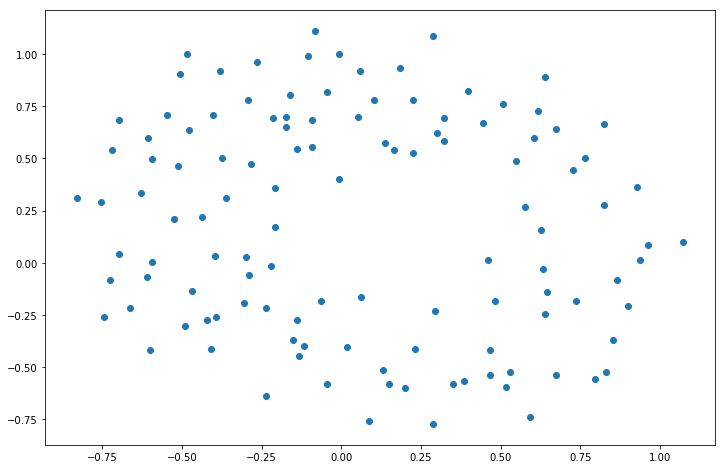

In [66]:
fig, axes = plt.subplots(figsize=(12, 8))
axes = plt.scatter(X[:, 0], X[:, 1])

In [67]:
## TODO: Add plot with marked class.

## 2.3 Feature mapping

In [68]:
# TODO: Implement this in Python.
from sklearn.preprocessing import PolynomialFeatures

def map_features(X):
    poly_features = PolynomialFeatures(degree=6, include_bias=True)
    X_poly = poly_features.fit_transform(X)
    return X_poly

In [69]:
X = map_features(X)

In [70]:
X.shape

(118, 28)

In [71]:
X

array([[  1.00000000e+00,   5.12670000e-02,   6.99560000e-01, ...,
          6.29470940e-04,   8.58939846e-03,   1.17205992e-01],
       [  1.00000000e+00,  -9.27420000e-02,   6.84940000e-01, ...,
          1.89305413e-03,  -1.39810280e-02,   1.03255971e-01],
       [  1.00000000e+00,  -2.13710000e-01,   6.92250000e-01, ...,
          1.04882142e-02,  -3.39734512e-02,   1.10046893e-01],
       ..., 
       [  1.00000000e+00,  -4.84450000e-01,   9.99270000e-01, ...,
          2.34007252e-01,  -4.82684337e-01,   9.95627986e-01],
       [  1.00000000e+00,  -6.33640000e-03,   9.99270000e-01, ...,
          4.00328554e-05,  -6.31330588e-03,   9.95627986e-01],
       [  1.00000000e+00,   6.32650000e-01,  -3.06120000e-02, ...,
          3.51474517e-07,  -1.70067777e-08,   8.22905998e-10]])

## 2.4 Cost function

In [72]:
m, n = X.shape
initial_theta = np.zeros((n, 1))
lambda_param = 1

In [73]:
y.shape

(118, 1)

In [74]:
def cost_function_regular(theta, X, y, lambda_param):
    m = len(y)
    prediction = sigmoid(np.dot(X, theta))
    cost_expr = (1 / m) * np.sum(-np.dot(y.T, np.log(prediction)) - np.dot((1 - y).T, np.log(1 - prediction)))
    lambda_expr = (lambda_param / (2 * m)) * np.sum(theta[1:]**2)
    J_theta = cost_expr + lambda_expr
    return J_theta

In [75]:
J_theta = cost_function_regular(initial_theta, X, y, lambda_param)
J_theta

0.69314718055994529

In [76]:
assert round(J_theta, 3) == 0.693, "Incorrect value."

In [77]:
initial_theta = np.ones((n, 1))
lambda_param = 10

In [78]:
J_theta = cost_function_regular(initial_theta, X, y, lambda_param)
J_theta

3.1645093316150099

In [79]:
assert round(J_theta, 2) == 3.16, "Incorrect value."

## 2.5 Gradient descent

In [80]:
iters = 1500000
alpha = 0.0034
initial_theta = np.zeros((n, 1))
lambda_param = 1

In [101]:
initial_theta.shape

(28, 1)

In [104]:
def gradient_descent(X, y, theta, alpha, iters, lambda_param):
    m, n = X.shape
    print(m)
    theta_res = theta.copy()
    for _ in range(1):
        prediction = sigmoid(np.dot(X, theta_res))
        print(prediction.shape)
        cost_expr = (1 / m) * np.dot(X.T, prediction - y)
        print(cost_expr.shape)
        theta_regular = np.insert(theta_res[1:], 0, 0).reshape((n, 1))
        print(theta_regular.shape)
        lambda_expr = (lambda_param / m) * theta_regular
        print(lambda_expr.shape)
        theta_res = theta_res - alpha * (cost_expr + lambda_expr)
        print(theta_res.shape)
    return theta_res

In [105]:
theta_res = gradient_descent(X, y, initial_theta, alpha, iters, lambda_param)

118
(118, 1)
(28, 1)
(28, 1)
(28, 1)
(28, 1)


In [88]:
theta_res.shape

(28, 1)

In [89]:
theta_res

array([[ 1.27273951],
       [ 0.6252718 ],
       [ 1.18108869],
       [-2.01996086],
       [-0.91742375],
       [-1.43166444],
       [ 0.12400635],
       [-0.36553437],
       [-0.35723962],
       [-0.17513048],
       [-1.45815646],
       [-0.05098906],
       [-0.61555504],
       [-0.27470631],
       [-1.19281652],
       [-0.24218823],
       [-0.20600609],
       [-0.04473075],
       [-0.2777845 ],
       [-0.2953781 ],
       [-0.45635749],
       [-1.04320249],
       [ 0.02777171],
       [-0.29243131],
       [ 0.01556681],
       [-0.32737959],
       [-0.14388693],
       [-0.92465257]])

In [86]:
# We are using unregularized cost to get the 
J_theta = cost_function(theta_res, X, y)
J_theta

0.4624593959217056

In [ ]:
# TODO: Visualize the boundary

In [ ]:
prediction = predict(theta_res, X)

In [ ]:
(prediction == y).astype(int).mean() # accuracy score

In [ ]:
# TODO: Try the following values of lambda (0, 1, 10, 100).
# How does the decision boundary change when you vary lambda? How does the training set accuracy vary?

In [ ]:
# TODO: Implement this using optimizers like here:
# https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy

# Add grad and cost functions. 